In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
demographics = pd.read_sas('data/DEMO_I.XPT')
demographics.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32
2,83734.0,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,...,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51
3,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00
4,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23


In [3]:
questionaire = pd.read_sas('data/DUQ_I.XPT')
questionaire.head()

,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,1.0,25.0,1.0,25.0,5.397605e-79,1.0,5.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,1.0,15.0,1.0,16.0,1.000000e+00,4.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
merged = pd.merge(demographics, questionaire, on = 'SEQN')
merged.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,9.0,2.0,1.0,22.0,NaN,4.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [5]:
cols = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'INDHHIN2', 
        'INDFMPIR', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DUQ200', 'DUQ210', 'DUQ217', 'DUQ211', 
        'DUQ213', 'DUQ215Q', 'DUQ219', 'DUQ220Q', 'DUQ230']
df = merged[cols]
df['CHILDREN_NUM'] = df['DMDHHSZA'] + df['DMDHHSZB']
df = df.drop(columns = ['DMDHHSZA', 'DMDHHSZB'])

/Users/osvaldo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [6]:
lst_7 = ['DMDEDUC2', 'DUQ200', 'DUQ217', 'DUQ211', 'DUQ219']
lst_77 = ['DMDMARTL', 'DMDEDUC3', 'INDHHIN2']
lst_777 = ['DUQ210', 'DUQ213', 'DUQ230']

for i in lst_7:
    df[i] = df[i].replace({7: 7777, 9: 9999})
for i in lst_77:
    df[i] = df[i].replace({77: 7777, 99: 9999})
for i in lst_777:
    df[i] = df[i].replace({777: 7777, 999: 9999})

In [7]:
translation_dict = {'SEQN': 'ID', 'RIAGENDR': 'GENDER', 'RIDAGEYR': 'AGE', 'DMDMARTL': 'MARRIAGE', 
                    'RIDEXPRG': 'PREGNANCY', 'INDHHIN2': 'INCOME', 'INDFMPIR': 'INCOME_RATIO', 
                    'DMDHHSIZ': 'HOUSEHOLD_NUM', 'DMDHHSZE': 'OVER_60_NUM', 'DUQ200': 'EVER_USE', 
                    'DUQ210': 'FIRST_USAGE', 'DUQ217': 'FREQUENCY', 'DUQ211': 'PER_MONTH', 
                    'DUQ213': 'PER_YEAR', 'DUQ215Q': 'LAST_ONCE_MONTH', 'DUQ219': 'AMOUNT', 'DUQ220Q': 'LAST_USAGE', 
                    'DUQ230': 'PAST_MONTH_USAGE', 'DMDEDUC2': 'EDUCATION_ADULT', 'DMDEDUC3': 'EDUCATION_KID'}
df = df.rename(index = str, columns = translation_dict)
df.head(10)

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,5.397605e-79,4.0,1.0,30.0,2.000000e+00
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.000000e+00,2.0,1.0,25.0,1.079521e-78
5,83742.0,2.0,32.0,NaN,4.0,1.0,2.0,6.0,1.03,4.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,13.0,NaN,2.000000e+00
6,83743.0,1.0,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
7,83744.0,1.0,56.0,NaN,3.0,3.0,NaN,3.0,1.19,1.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,20.0,NaN,1.079521e-78
8,83747.0,1.0,46.0,NaN,5.0,6.0,NaN,3.0,0.75,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
9,83750.0,1.0,45.0,NaN,2.0,5.0,NaN,10.0,1.36,5.0,...,1.0,21.0,NaN,2.0,NaN,NaN,NaN,20.0,1.0,2.000000e+00


In [8]:
#OVER_60_NUM
#LAST_ONCE_MONTH
#CHILDREN_NUM
df['OVER_60_NUM'] = df['OVER_60_NUM'].round(0)
df['LAST_ONCE_MONTH'] = df['LAST_ONCE_MONTH'].round(0)
df['CHILDREN_NUM'] = df['CHILDREN_NUM'].round(0)
df['INCOME_RATIO'] = df['INCOME_RATIO'].replace({5.397605e-79: 0}).round(2)

In [9]:
df.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,0.0,4.0,1.0,30.0,2.0
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0


In [10]:
#write dataframe to csv file
df.to_csv("cleaned_marijuana_data.csv")

In [11]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "b", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

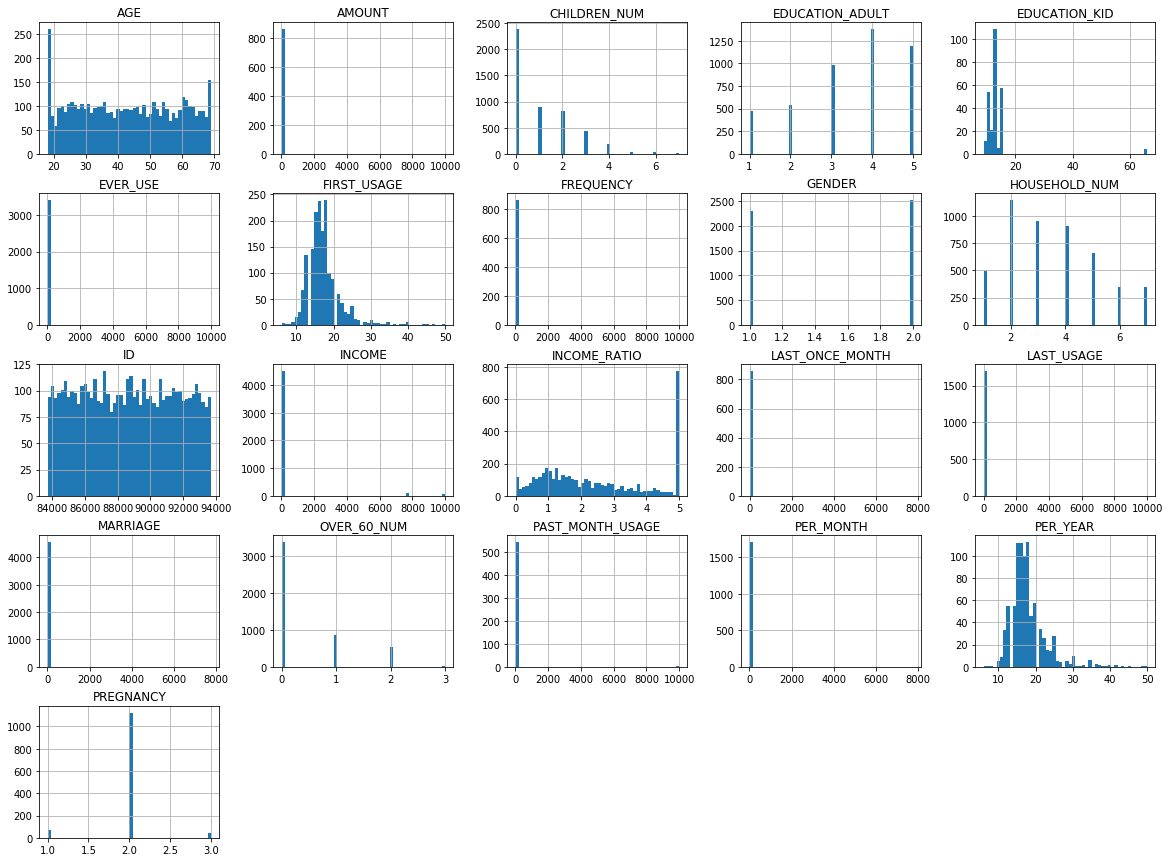

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

# GENDER VS FIRST_USAGE

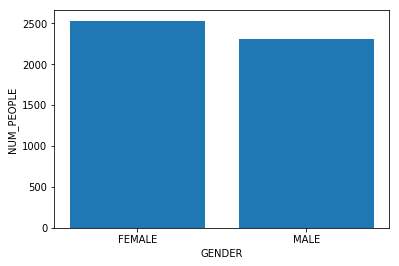

In [13]:
names = ['FEMALE', 'MALE']
index = pd.Index(df.GENDER)
index = index.value_counts()
plt.bar(names,index)
plt.xlabel('GENDER')
plt.ylabel('NUM_PEOPLE')

f1 = plt.gcf()

In [14]:
df_M = df[df['GENDER'] == 1.0] #MALE
df_F = df[df['GENDER'] == 2.0] #FEMALE

In [15]:
df_FIRST = df.FIRST_USAGE.dropna() #MALE

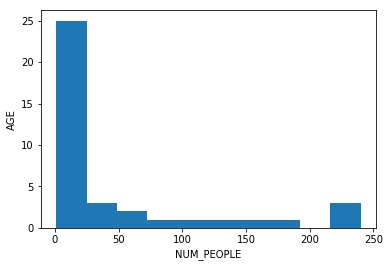

In [16]:
name = ['FIRST_USAGE']
index = pd.Index(df_FIRST)
index = index.value_counts()
plt.hist(index)
plt.xlabel('NUM_PEOPLE')
plt.ylabel('AGE')

f1 = plt.gcf()

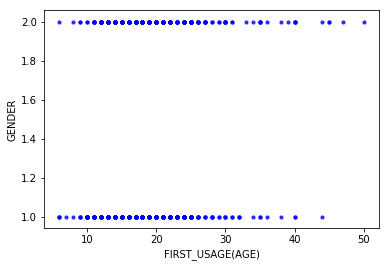

In [17]:
scatterplot(df.FIRST_USAGE,df.GENDER,"FIRST_USAGE(AGE)","GENDER")

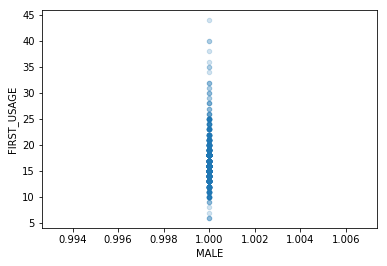

In [58]:
df_M.rename(columns={'GENDER':'MALE'}, inplace=True)
df_M.plot(kind="scatter", x="MALE", y="FIRST_USAGE", alpha=0.2)
plt.savefig('map1.png')

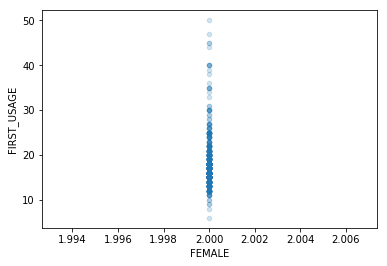

In [59]:
df_F.rename(columns={'GENDER':'FEMALE'}, inplace=True)
df_F.plot(kind="scatter", x="FEMALE", y="FIRST_USAGE", alpha=0.2)
plt.savefig('map1.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12490eef0>,
      dtype=object)

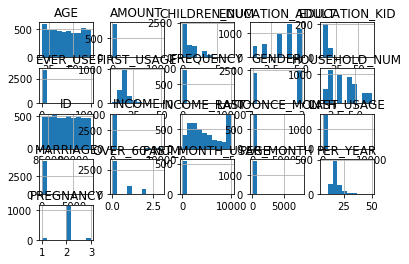

In [67]:
df.hist()
#df_M.plot(x='MALE', y='FIRST_USAGE',style='2')

# GENDER VS FREQUENCY

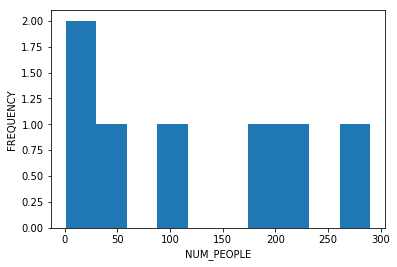

In [61]:
names = ['FREQUENCY']
index = pd.Index(df.FREQUENCY)
index = index.value_counts()
plt.hist(index)
plt.xlabel('NUM_PEOPLE')
plt.ylabel('FREQUENCY')

f1 = plt.gcf()

In [62]:
df_F.FREQUENCY.value_counts()

5.0       103
4.0        87
3.0        73
2.0        57
1.0        24
9999.0      1
7777.0      1
Name: FREQUENCY, dtype: int64

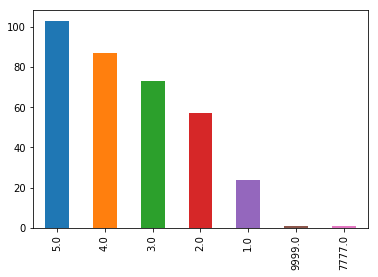

In [63]:
index = pd.Index(df_F.FREQUENCY)
index = index.value_counts()
index.plot.bar()


f1 = plt.gcf()

In [64]:
df_M.FREQUENCY.value_counts()

5.0       187
4.0       137
3.0       113
2.0        56
1.0        30
7777.0      1
Name: FREQUENCY, dtype: int64

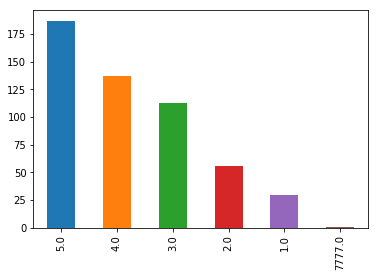

In [25]:
index = pd.Index(df_M.FREQUENCY)
index = index.value_counts()
index.plot.bar()


f1 = plt.gcf()

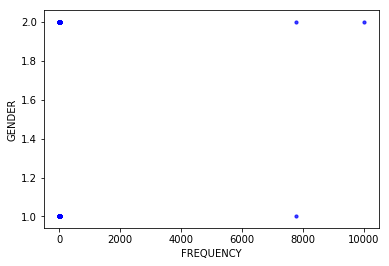

In [26]:
scatterplot(df.FREQUENCY,df.GENDER,"FREQUENCY","GENDER")

# GENDER VS AMOUNT

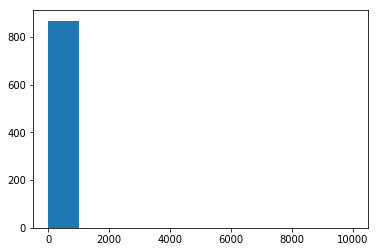

In [45]:
plt.hist(df.AMOUNT)
plt.show()

In [49]:
df_M.AMOUNT.value_counts()

2.0       177
1.0       175
3.0       129
4.0        41
9999.0      1
7777.0      1
Name: AMOUNT, dtype: int64

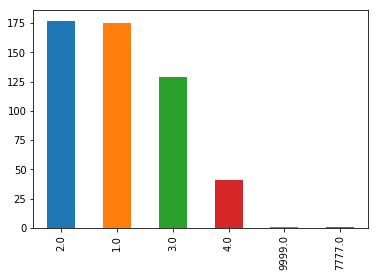

In [50]:
index = pd.Index(df_M.AMOUNT)
index = index.value_counts()
index.plot.bar()


f1 = plt.gcf()

In [51]:
df_F.AMOUNT.value_counts()

1.0    151
2.0    116
3.0     63
4.0     16
Name: AMOUNT, dtype: int64

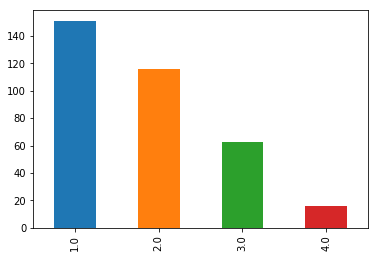

In [52]:
index = pd.Index(df_F.AMOUNT)
index = index.value_counts()
index.plot.bar()


f1 = plt.gcf()

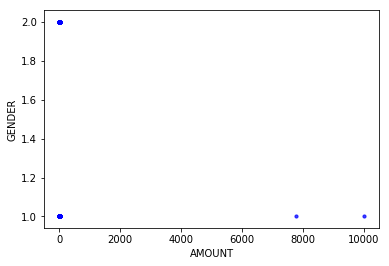

In [53]:
scatterplot(df.AMOUNT,df.GENDER,"AMOUNT","GENDER")

# TO FIND THE CORRELATION

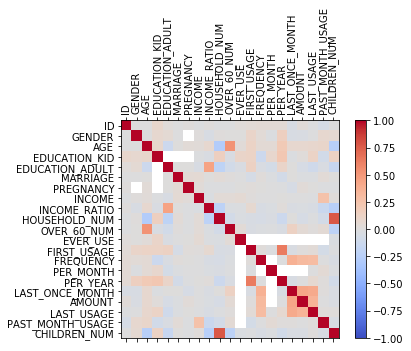

In [55]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

# HOUSEHOLD vs FREQUENCY

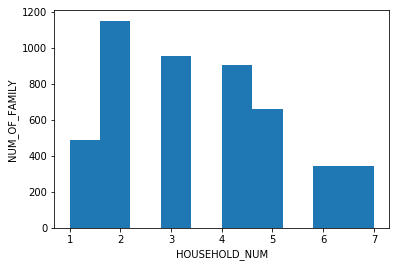

In [56]:
plt.hist(df.HOUSEHOLD_NUM)
plt.xlabel('HOUSEHOLD_NUM')
plt.ylabel('NUM_OF_FAMILY')
plt.show()

In [81]:
df.FREQUENCY.value_counts()

5.0       290
4.0       224
3.0       186
2.0       113
1.0        54
7777.0      2
9999.0      1
Name: FREQUENCY, dtype: int64

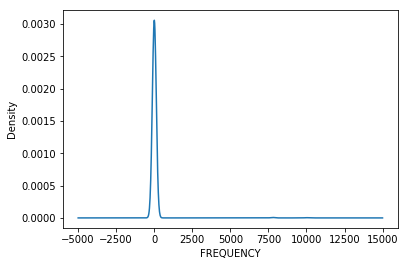

In [84]:
df.FREQUENCY.plot(kind='density', subplots=True, sharex=False)
plt.xlabel('FREQUENCY')
f3 = plt.gcf()

In [82]:
df.HOUSEHOLD_NUM.value_counts()

2.0    1149
3.0     951
4.0     903
5.0     661
1.0     490
6.0     345
7.0     344
Name: HOUSEHOLD_NUM, dtype: int64

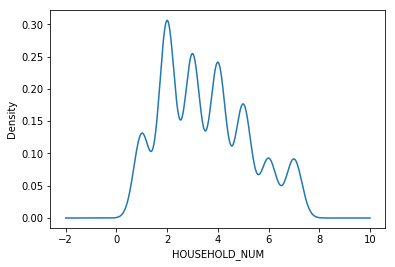

In [85]:
df.HOUSEHOLD_NUM.plot(kind='density', subplots=True, sharex=False)
plt.xlabel('HOUSEHOLD_NUM')
f3 = plt.gcf()

In [137]:
print( df[['HOUSEHOLD_NUM','FREQUENCY']].corr())

               HOUSEHOLD_NUM  FREQUENCY
HOUSEHOLD_NUM       1.000000  -0.047405
FREQUENCY          -0.047405   1.000000


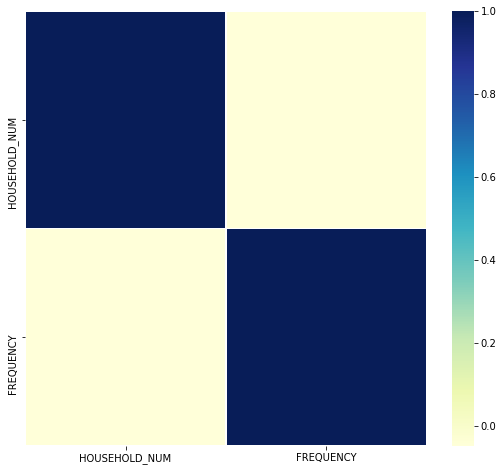

In [138]:
import seaborn as sns 
storeCorrlation = df[['HOUSEHOLD_NUM','FREQUENCY']].corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(storeCorrlation, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

# AGE VS AMOUNT

In [141]:
print(df[['AGE','AMOUNT']].corr())

             AGE    AMOUNT
AGE     1.000000  0.077413
AMOUNT  0.077413  1.000000


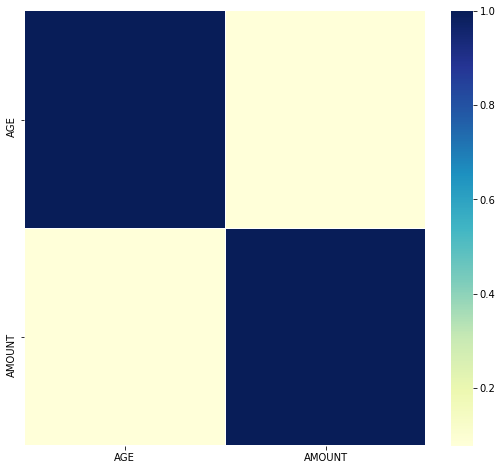

In [142]:
storeCorrlation = df[['AGE','AMOUNT']].corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(storeCorrlation, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 